# Прогнозы и предсказания

## Описание проекта

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.

Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.

Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.

Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.

Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Ваша задача — провести анализ и подготовить план действий по удержанию клиентов.

А именно:

1. научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
2. сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
3. проанализировать основные признаки, наиболее сильно влияющие на отток;
4. сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
        1) выделить целевые группы клиентов;
        2) предложить меры по снижению оттока;
        3) определить другие особенности взаимодействия с клиентами.

## Шаг 1. Загрузите данные

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans

In [2]:
gym = pd.read_csv('/datasets/gym_churn.csv')

In [3]:
gym.head(10)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


In [4]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


In [5]:
gym.duplicated().sum()

0

In [6]:
gym.isna().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

In [7]:
gym.columns = gym.columns.str.lower()

Загрузили данные, датасет состоит из 4000 строк. Пропусков и дубликатов нет. Названия столбцов приведены к нижнему регистру.

## Шаг 2. Проведите исследовательский анализ данных (EDA)

### Посмотрите на датасет: есть ли в нем отсутствующие признаки, изучите средние значения и стандартные отклонения

In [8]:
gym.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


На данном этапе можем заметить, что представителей двух гендеров примерно поровну, в среднем люди живут близко к фитнес-клубу, а средний возраст - 29 лет. Пропущенных признаков не обнаружено.

### Посмотрите на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался

In [9]:
gym.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Можно заметить, что у тех, кто ушел, осталось мало врмени по контракту. Партнеры клуба и участники акции "приведи друга" составляют меньшую долю среди ушедших.

### Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)

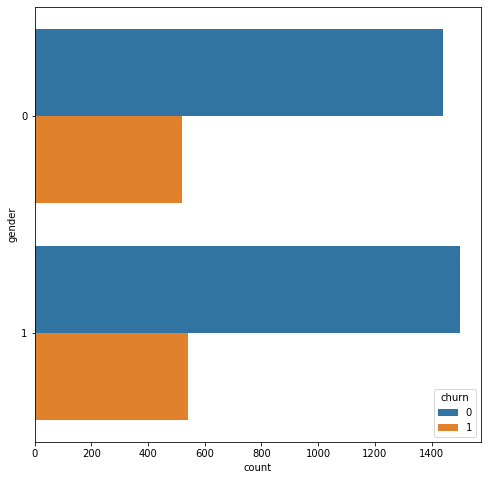

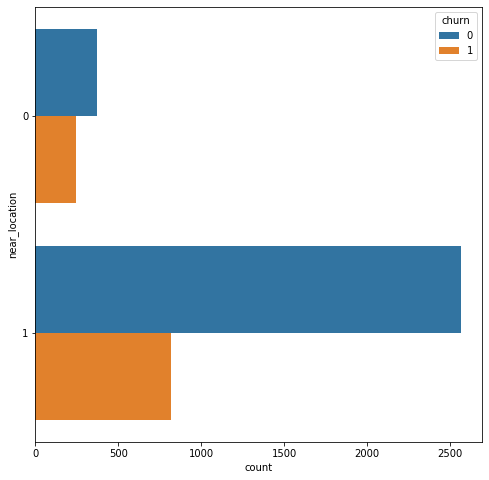

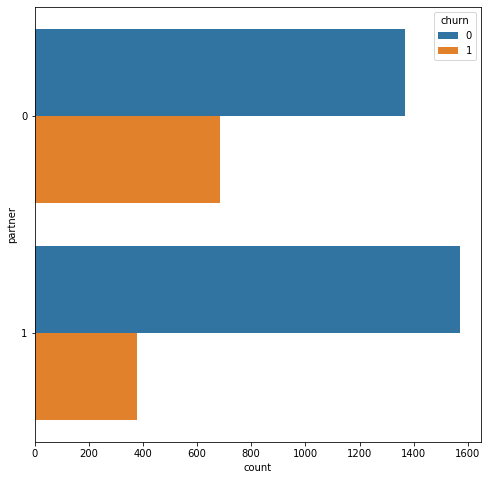

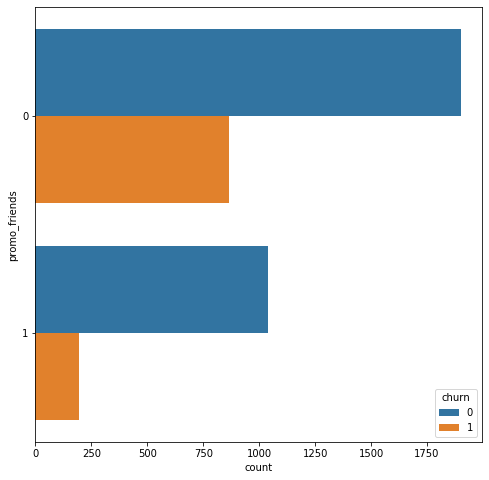

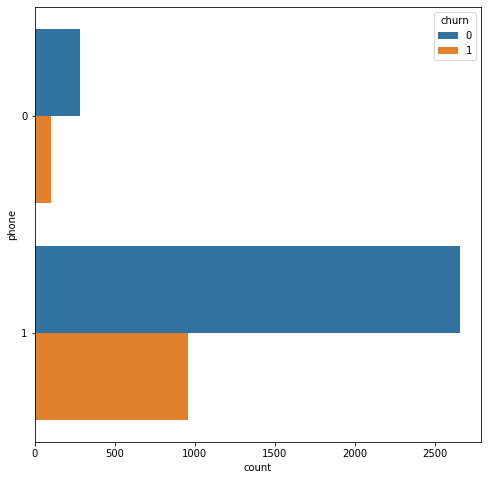

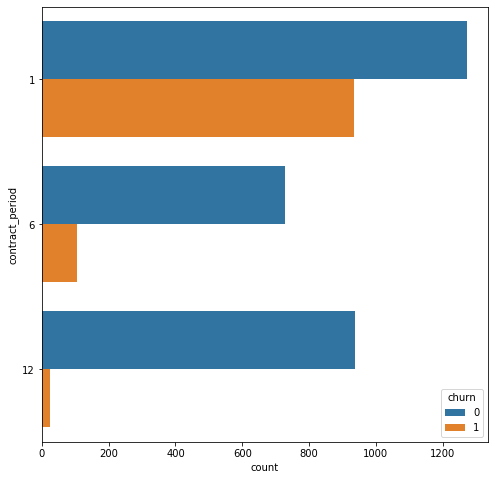

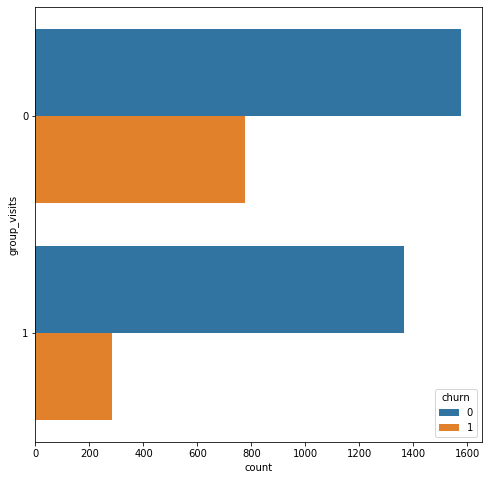

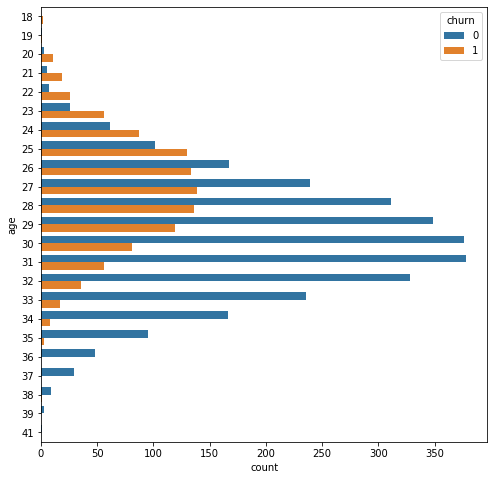

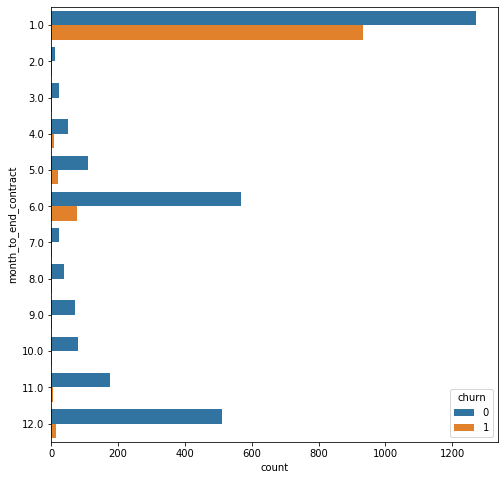

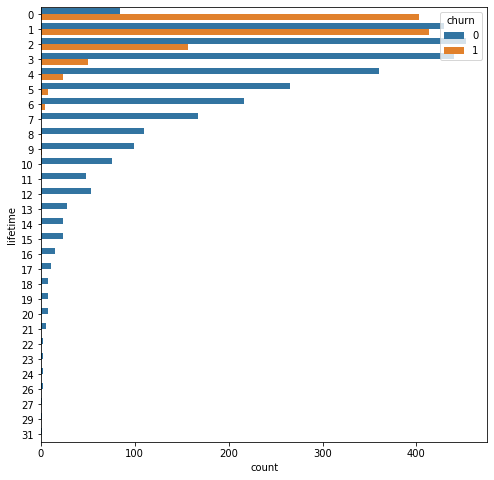

In [10]:
for col in gym.drop([
    'churn','avg_additional_charges_total','avg_class_frequency_total','avg_class_frequency_current_month'], axis = 1).columns:
    plt.figure(figsize = (8,8))
    sns.countplot(y=col, hue='churn',  data=gym)
    plt.show()

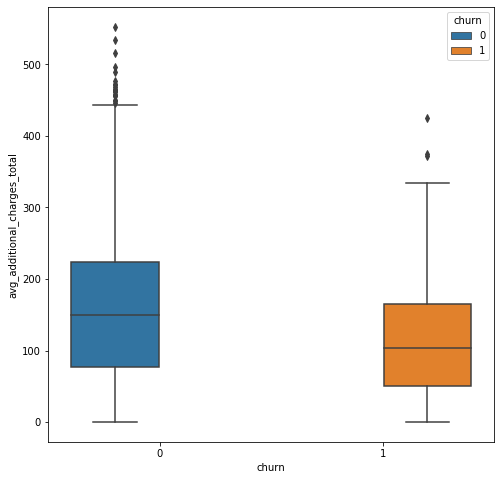

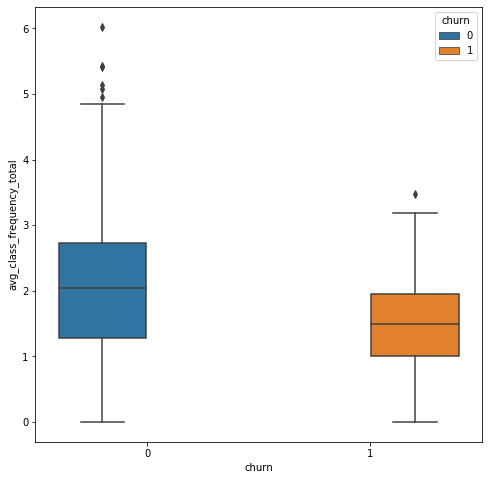

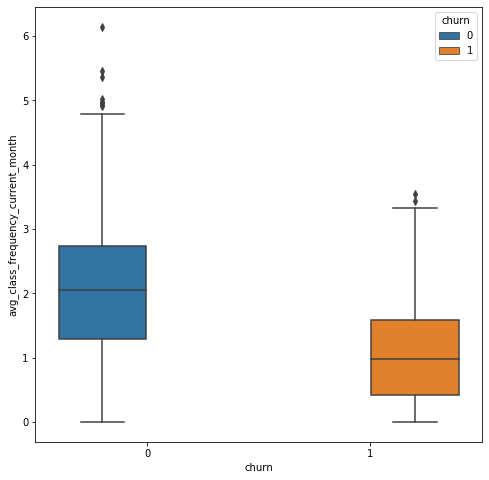

In [11]:
not_hyst = ['avg_additional_charges_total','avg_class_frequency_total','avg_class_frequency_current_month']
for col in not_hyst:
    plt.figure(figsize = (8,8))
    sns.boxplot(y=gym[col], x='churn', hue = 'churn',  data=gym)
    plt.show()

На данном этапе построили гистограммы для всех признаков с разделением на тех, кто ушел и тех, кто остался. Для "средних" признаков построили боксплоты. По графикам видно, что доля ушедших значительно меньше доли оставшихся.

### Постройте матрицу корреляций и отобразите её

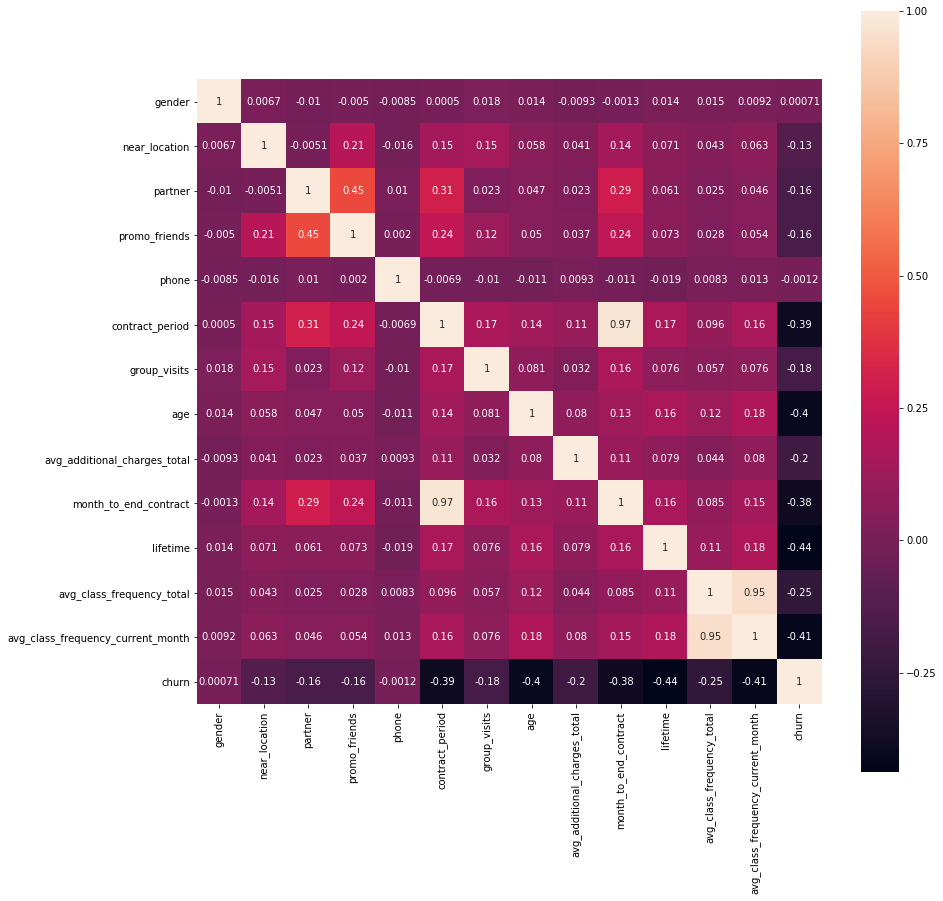

In [12]:
#построим и отрисуем матрицу корреляций
cm = gym.corr() #вычисляем матрицу корреляций
plt.figure(figsize = (14,14))
#нарисуем тепловую карту с подписями для матрицы корреляций
sns.heatmap(cm, annot = True, square=True)

plt.show()

Самые коррелирующие признаки - длина контракта и количество месяцев до окончания контракта и средняя посещаемость за месяц и в целом.

## Шаг 3. Постройте модель прогнозирования оттока клиентов

Целевой признак — факт оттока клиента в следующем месяце.

In [13]:
X = gym.drop('churn', axis = 1)
y = gym['churn']

Разобьем выборку на обучающую и валидационную.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Стандартизируем данные.

In [15]:
# обучите StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)

# Преобразуйте обучающий и валидационные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

In [16]:
def print_all_metrics(y_true, y_pred, y_proba, title='Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))


Обучим модели логистической регрессией и случайным лесом.

In [17]:
models = [LogisticRegression(solver='liblinear'), RandomForestClassifier(n_estimators=100, random_state=0)]


In [18]:
for i in models:
    # обучим модель
    i.fit(X_train_st, y_train)
    
    # воспользуемся уже обученной моделью, чтобы сделать прогнозы
    probabilities = i.predict_proba(X_test_st)[:, 1]
    
    # бинарный прогноз
    predictions = i.predict(X_test_st)

    # выведите все изученные метрики для полученного прогноза
    print_all_metrics(
        y_test,
        predictions,
        probabilities,
        title= i,
    )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.83
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.81


Судя по метрикам, логистическая регрессия немного лучше справляется, чем случайный лес.

## Шаг 4. Сделайте кластеризацию клиентов

Отложим в сторону столбец с оттоком.

In [19]:
gym_new = gym.drop(['churn'], axis = 1)

In [20]:
gym_new.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078


### Стандартизируйте данные.

In [21]:
sc = StandardScaler()
x_sc = sc.fit_transform(gym_new)

### Постройте матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуйте дендрограмму.

In [22]:
linked = linkage(x_sc, method = 'ward') 

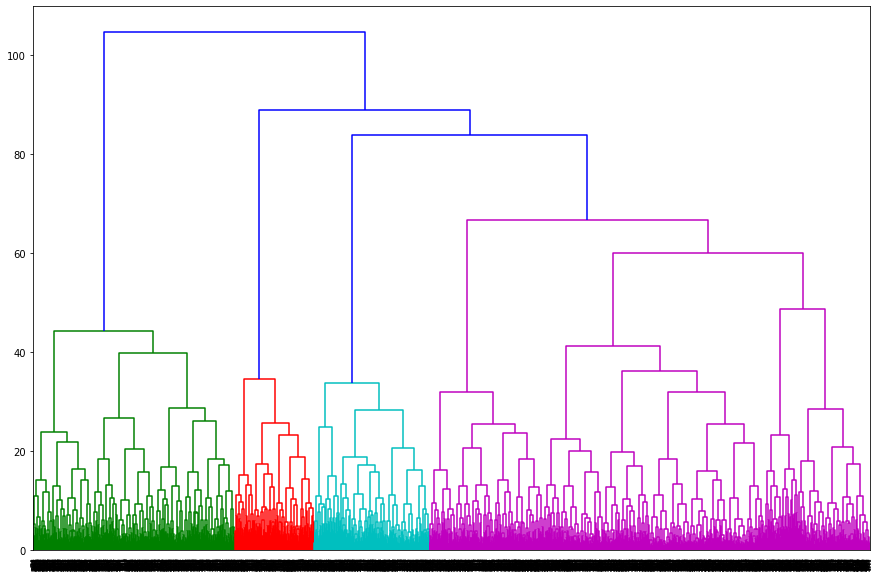

In [23]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show() 

Судя по графику, можно выделить от 4 до 6 кластеров. Мы выделим 5.

### Обучите модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов.

In [24]:
# задаём модель k_means с числом кластеров 5
km = KMeans(n_clusters = 5, random_state =0)
# прогнозируем кластеры для наблюдений
labels = km.fit_predict(x_sc)

# сохраняем метки кластера в поле нашего датасета
gym['cluster_km'] = labels
gym_new['cluster_km'] = labels

### Посмотрите на средние значения признаков для кластеров.

In [25]:
gym_new.groupby('cluster_km').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
cluster_km,,,,,,,,,,,,,
0,0.565947,0.881295,0.390887,0.239808,0.998801,2.760192,0.453237,30.251799,162.942251,2.535971,5.007194,2.936567,2.940138
1,0.487293,1.000000,0.000000,0.099448,1.000000,1.890608,0.366851,28.244199,133.752686,1.811050,2.486188,1.369936,1.145125
2,0.503435,0.950932,0.775270,0.563297,1.000000,10.887144,0.550540,29.955839,162.402492,9.945044,4.759568,1.956122,1.946510
3,0.483081,0.513419,0.758460,0.294049,1.000000,2.071179,0.249708,28.168028,128.264938,1.960327,2.464411,1.310061,1.091597
4,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369


Можно сразу заметить, что у одного кластера большая продолжительность контракта и большое количество оставшихся месяцев по контракту. Еще в одном кластере собрались клиенты, не оставившие номера телефона.

### Постройте распределения признаков для кластеров.

In [26]:
gym_new.groupby('cluster_km').describe()

gender                                              near_location  \
             count      mean       std  min  25%  50%  75%  max         count   
cluster_km                                                                      
0            834.0  0.565947  0.495929  0.0  0.0  1.0  1.0  1.0         834.0   
1            905.0  0.487293  0.500115  0.0  0.0  0.0  1.0  1.0         905.0   
2           1019.0  0.503435  0.500234  0.0  0.0  1.0  1.0  1.0        1019.0   
3            857.0  0.483081  0.500005  0.0  0.0  0.0  1.0  1.0         857.0   
4            385.0  0.522078  0.500162  0.0  0.0  1.0  1.0  1.0         385.0   

                      ... avg_class_frequency_total            \
                mean  ...                       75%       max   
cluster_km            ...                                       
0           0.881295  ...                  3.334439  6.023668   
1           1.000000  ...                  1.848626  3.030928   
2           0.950932  ...                  2.616218  5.079242   
3           0.513419  ...                  1.783444  3.173901   
4           0.862338  ...                  2.391508  4.793780   

           avg_class_frequency_current_month                                \
                                       count      mean       std       min   
cluster_km                                                                   
0                                      834.0  2.940138  0.669580  1.380459   
1                                      905.0  1.145125  0.694169  0.000000   
2                                     1019.0  1.946510  0.927122  0.000000   
3                                      857.0  1.091597  0.710744  0.000000   
4                                      385.0  1.716369  1.013286  0.000000   

                                                    
                 25%       50%       75%       max  
cluster_km                                          
0           2.451035  2.878829  3.342615  6.146783  
1           0.605247  1.145567  1.658654  2.812503  
2           1.307831  1.962460  2.607688  4.976680  
3           0.530940  1.093720  1.634070  3.059642  
4           1.022833  1.653470  2.383973  4.729706  

[5 rows x 104 columns]

Опять построим гистограммы там, где возможно.

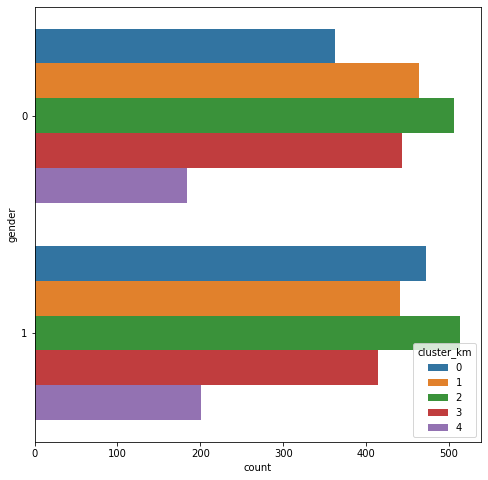

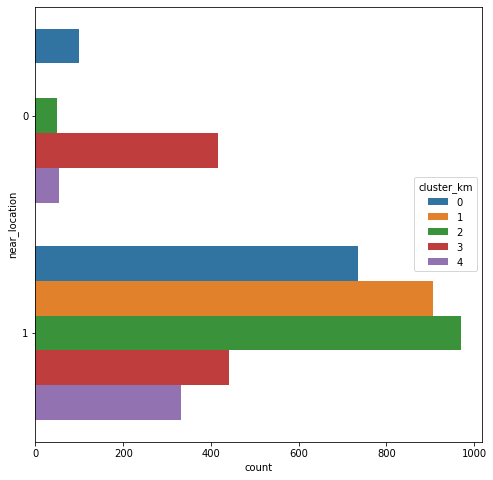

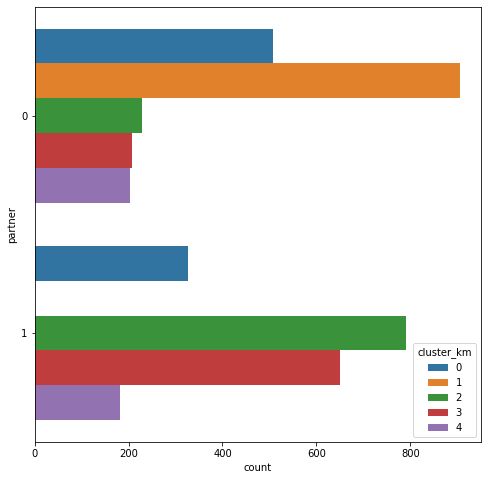

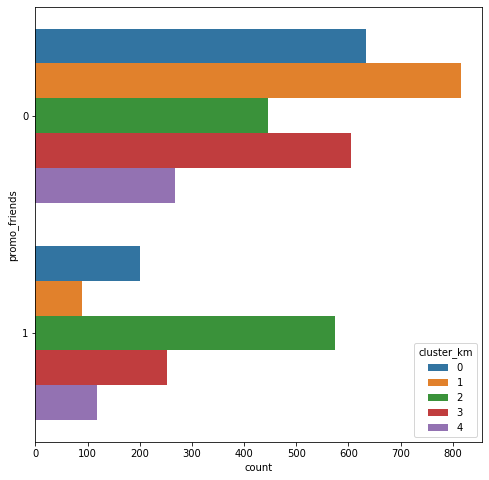

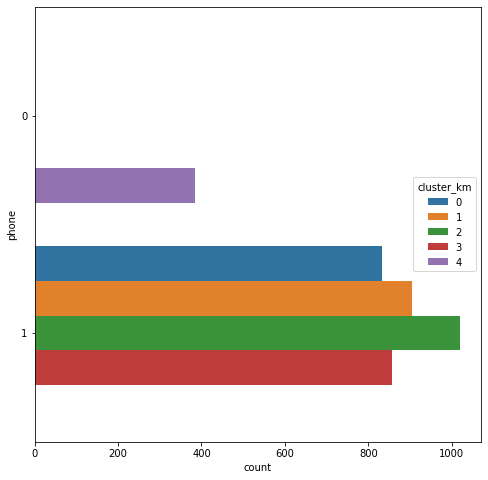

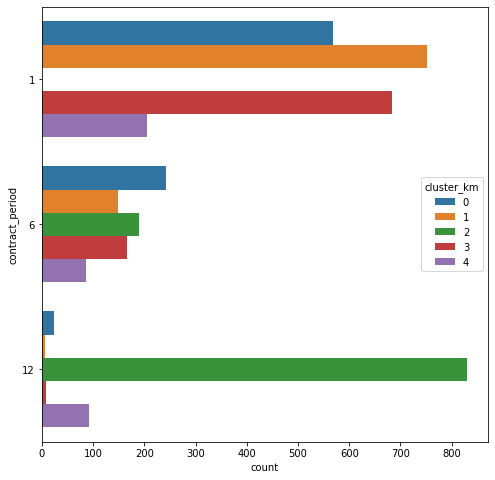

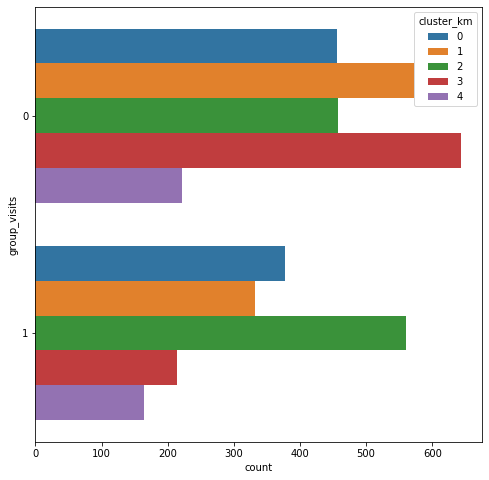

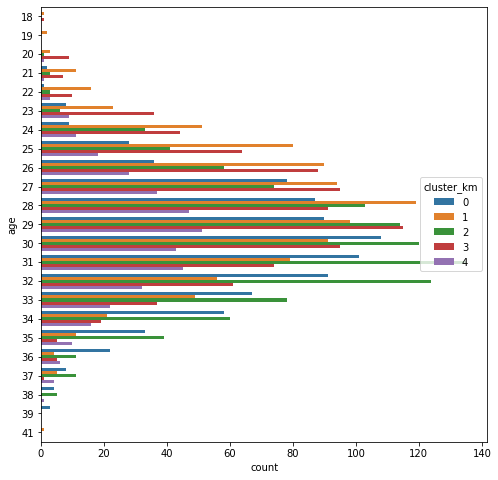

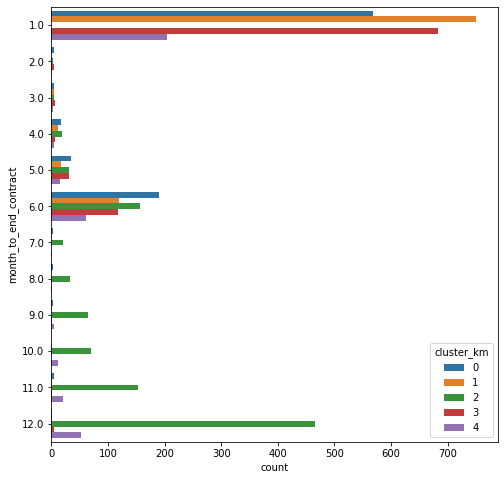

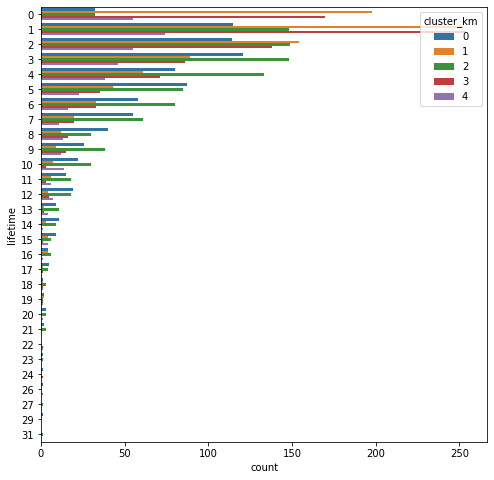

In [27]:
for col in gym_new.drop(['cluster_km','avg_additional_charges_total','avg_class_frequency_total','avg_class_frequency_current_month'], axis = 1).columns:
    plt.figure(figsize = (8,8))
    sns.countplot(y=gym_new[col], hue='cluster_km',  data=gym_new)
    plt.show()

Для средних значений опять построим боксплоты.

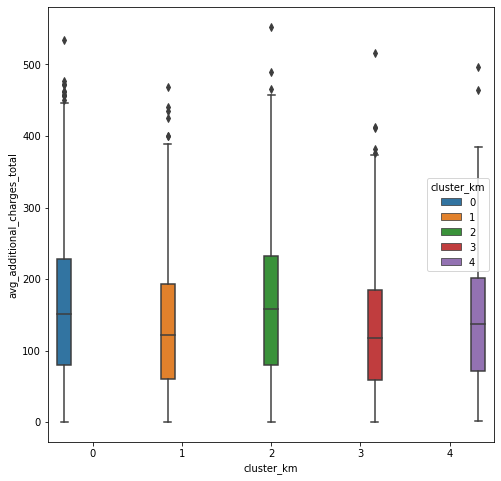

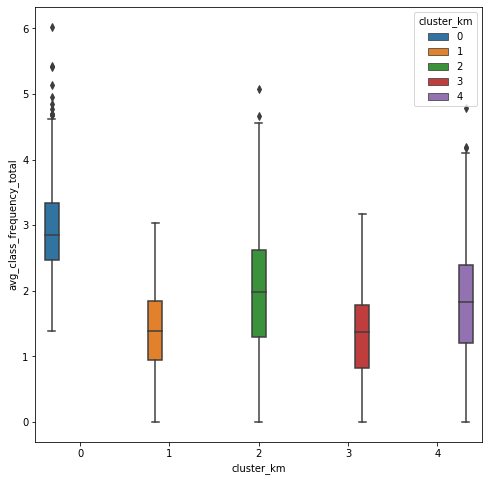

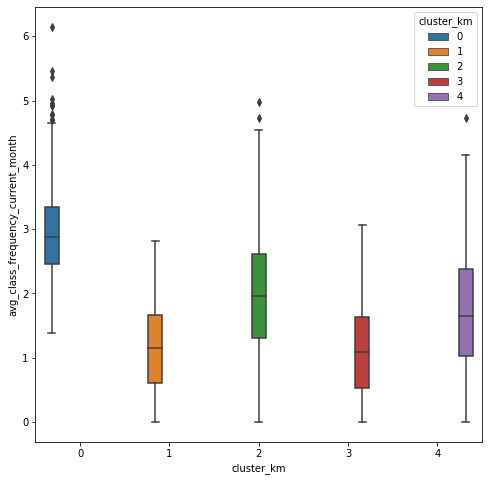

In [28]:
for col in not_hyst:
    plt.figure(figsize = (8,8))
    sns.boxplot(y=gym_new[col], x='cluster_km', hue = 'cluster_km',  data=gym_new)
    plt.show()

Три гистограммы получились не очень репрезентативными, построим для этих признаков боксплоты.

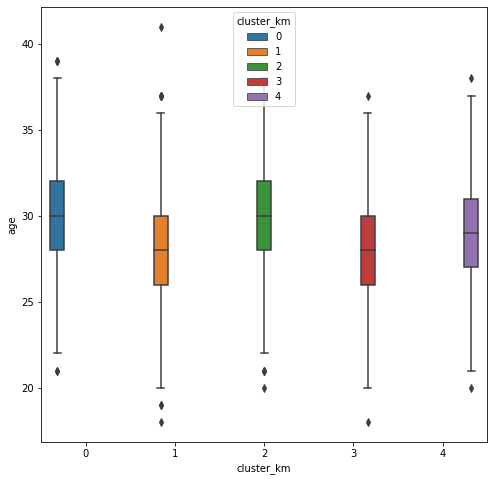

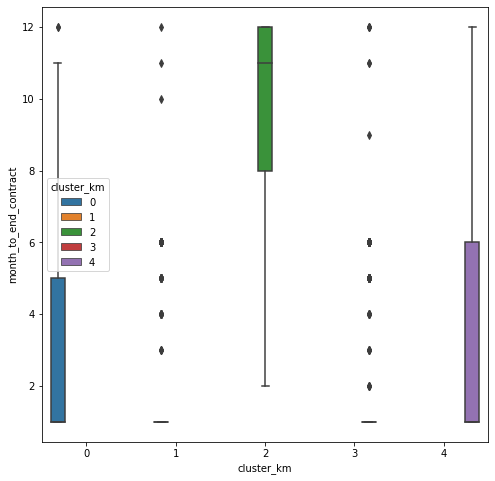

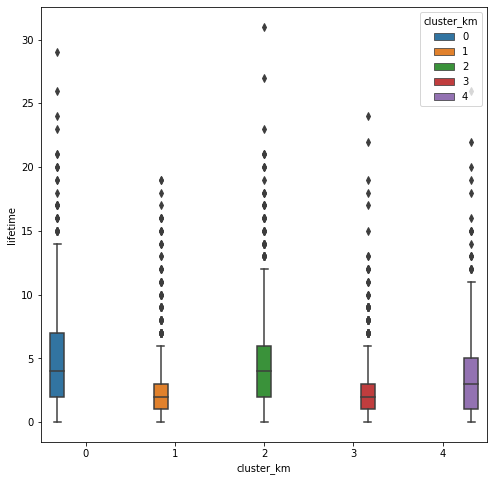

In [29]:
hyst_box = ['age', 'month_to_end_contract', 'lifetime']
for col in hyst_box:
    plt.figure(figsize = (8,8))
    sns.boxplot(y=gym_new[col], x='cluster_km', hue = 'cluster_km',  data=gym_new)
    plt.show()

По распределению возраста, и пола все кластеры примерно похожи. У одного кластера значительно больше месяцев до окончания контракта, а у двух кластеров этих месяцев не осталось. Еще в одном кластере собрались все люди без оставленного телефонного номера, а в другом - люди, живущие далеко от спортзала. Но пока что не понятно, как эти все признаки влияют на отток. (Я не указываю номера кластеров, потому что они постоянно меняются.)

### Для каждого полученного кластера посчитайте долю оттока

In [30]:
gym.groupby('cluster_km')['churn'].mean()

cluster_km
0    0.045564
1    0.512707
2    0.025515
3    0.501750
4    0.267532
Name: churn, dtype: float64

У двух кластеров доля оттока минимальна, у двух - близка к 50% и у еще одного - к 25%.

## Шаг 5. Сформулируйте выводы и сделайте базовые рекомендации по работе с клиентами

Довольно сложно понять, какие признаки влияют на отток пользователей.
Нельзя выделить какой-то один признак, из-за которого люди перестают ходить и точно так же нельзя выделить какой-то один признак, из-за которого люди не перестают ходить.

Возьмем, например, удаленность. Два кластера с наименьшим оттоком живут близко к спортклубу. С другой стороны, больше всего людей, живущих рядом, находятся в кластере, с наибольшим оттоком клиентов.

Кластер людей, не оставивших телефонов, показывает не самую высокую долю оттока.

Наверное, самым важным признаком является остаток месяцев по контракту со спортклубом. У двух кластеров с наивысшим оттоком осталось меньше месяца по контракту.

Кластер людей, пришедших вместе с друзьями, показывает очень небольшую долю оттока. То есть можно предлположить, что эта акция была успешной.

Также можно заметить корреляцию между участием в групповых занятиях и оттоком.

Какие могут быть рекомендации:

1. Можно продлить акцию "приведи друга" и предложить какие-то дополнительные скидки. Эта акция хорошо себя показала в плане привлечения клиентов с низкой долей оттока. Возможно это связано с тем, что заниматься чем-то с другом гораздо приятнее.

2. Можно попробовать подарить, например, предложить продлить абонементы с большой скидкой людям, у которых заканчиваются контракты. Эта мера может хорошо себя проявить, исходя из того факта, что у двух кластеров с наибольшей долей оттока почти не осталось времени по контрактам.

3. Предложить пробные бесплатные групповые занятия или же сделать на них скидку. Тут та же логика, что и в занятиях с другом. Вместе ходить в зал комфортнее и веселее.